<a href="https://colab.research.google.com/github/nafiul-araf/Credit-Risk-Modeling/blob/main/Credit_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Description***

**Credit Risk** is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. When someone fails to repay a loan, it is said to be in **default** otherwise **non-default**. Monitoring credit risk allows to understand which potential clients may come at too high risk and pre-defined risk tolerance.


**In this project**, I prepare credit risk application data. Then, I apply *machine learning models* and *business rules*, to predict probalibility of default on a loan and reduce risk with a view to ensuring the decrease of loss. After developing the best models, I develop a *business strategy* to make final decision.


This is a **classification problem** where I predict the probability of default which means the likelihood that someone will default on a loan. There are two classes in the output so it is a **binary classification** problem. Two classes are-


*   **0 ->** Non-Default
*   **1 ->** Default 



Here **two** machine learning models I have used-


*   **Logistic Regression-**  The logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. For more information [click here](https://www.statisticssolutions.com/what-is-logistic-regression/)
*   **eXtreme Gradient Boosting(XGBoost)-** It is an implementation of gradient boosting machines.  XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. For more information [click here](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)


The *model* and *framework* for this project-


*   **Discrete-time hazard model-** A discrete time hazard model for a population of loans assess the evaluation of PD considering, conjointly, the effects of explanatory variables, or risk factors and the time when a default occurs.
*   **Structural model framework-** Empirical studies of structural credit risk models so far are often based on parameters and test model-implied restrictions in a unified framework. The model explains the default even based on other factors.




# ***Loading The Data***

In [170]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [171]:
cr_loan=pd.read_csv("/content/gdrive/MyDrive/cr_loan2.csv")

In [172]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [173]:
cr_loan.shape

(32581, 12)

In [174]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

# ***Exploratory Data Analysis along with Data Prerocessing***

In [175]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

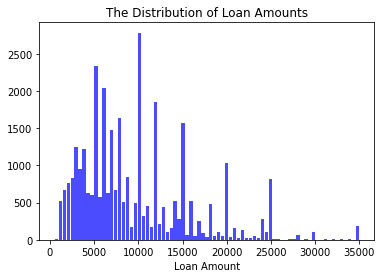

In [176]:
n,bins,patches=plt.hist(cr_loan['loan_amnt'],bins='auto',color='blue',alpha=0.7,rwidth=0.85)
plt.xlabel("Loan Amount")
plt.title("The Distribution of Loan Amounts")
plt.show()

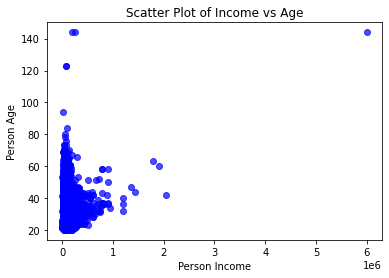

In [177]:
plt.scatter(cr_loan['person_income'],cr_loan['person_age'],c='blue',alpha=0.7)
plt.xlabel("Person Income")
plt.ylabel("Person Age")
plt.title("Scatter Plot of Income vs Age")
plt.show()

***Cross Table gives high level view of selected columns and even aggregation such as min,max,avg etc.***

In [178]:
print("\nCross table of the loan intent and loan status\n")
pd.crosstab(cr_loan['loan_intent'],cr_loan['loan_status'],margins=True)


Cross table of the loan intent and loan status



loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [179]:
print("\nA cross table of home ownership, loan status, and grade\n")
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])


A cross table of home ownership, loan status, and grade



loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]

In [180]:
print("\nA cross table of home ownership, loan status, and average percent income\n")
pd.crosstab(cr_loan['person_home_ownership'],cr_loan['loan_status'],values=cr_loan['loan_percent_income'],aggfunc='mean')


A cross table of home ownership, loan status, and average percent income



loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


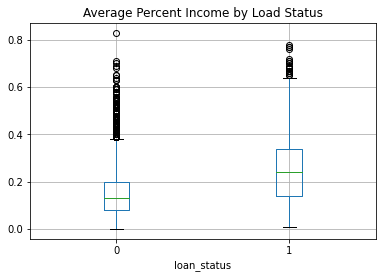

In [181]:
cr_loan.boxplot(column=['loan_percent_income'],by='loan_status')
plt.title("Average Percent Income by Load Status")
plt.suptitle('')
plt.show()

### ***Outlier Detection***
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Outlier Affect on variance, and standard deviation of a data distribution. In a data distribution, with extreme outliers, the distribution is skewed in the direction of the outliers which makes it difficult to analyze the data. It can also affect on machine learining model.

In [182]:
print("\nCross table for loan status, home ownership, and the max employment length\n")
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],values=cr_loan['person_emp_length'],aggfunc='max')


Cross table for loan status, home ownership, and the max employment length



person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


***It may not be possible for a person to have an employment length of less than 0 or greater than 60***

In [183]:
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

In [184]:
cr_loan.drop(indices,inplace=True)

In [185]:
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],values=cr_loan['person_emp_length'],aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,38.0,24.0,31.0,41.0
1,34.0,11.0,17.0,27.0


***After dropping the outliers, the crosstable looks more realistic!***

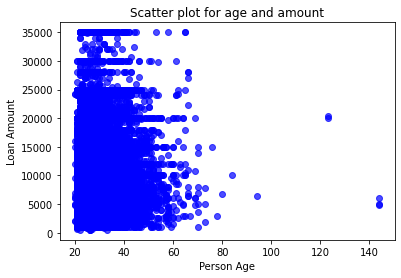

In [186]:
plt.scatter(cr_loan['person_age'],cr_loan['loan_amnt'],c='blue',alpha=0.7)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.title("Scatter plot for age and amount")
plt.show()

***It is very unlikely that a person applying for a loan will be over 100 years old***

In [187]:
cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index,inplace=True)

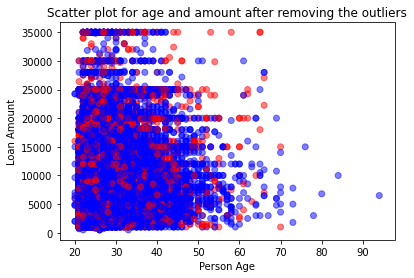

In [188]:
import matplotlib
colors=["blue","red"]
plt.scatter(cr_loan['person_age'],cr_loan['loan_amnt'],c=cr_loan['loan_status'],cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.title("Scatter plot for age and amount after removing the outliers")
plt.show()

### ***Missing Data***
Sometimes there maybe null values instead of actual value. It negatively affects meachine learning model performance and even may cause errors for some macjine learning models.

In [189]:
cr_loan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [190]:
print(cr_loan.columns[cr_loan.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


**Replacing the missing values of** ***person employment length*** **with median-**





In [191]:
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()),inplace=True)

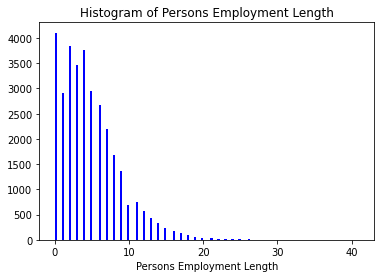

In [192]:
n,bins,patches=plt.hist(cr_loan['person_emp_length'],bins='auto',color='blue')
plt.xlabel("Persons Employment Length")
plt.title("Histogram of Persons Employment Length")
plt.show()

***Interest rates are set by the company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but we cannot know for sure***

***So,  it's best to remove these records...***

In [193]:
indices=cr_loan[cr_loan['loan_int_rate'].isnull()].index

In [194]:
cr_loan_clean=cr_loan.drop(indices)

***After handling the missing data, this is our clean data which is shown below-***

In [195]:
cr_loan_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [196]:
cr_loan_clean.shape

(29459, 12)

In [197]:
cr_loan_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

***No missing values......***

### ***Encoding***

Machine learning models cannot perform with nun-numeric columns. It will cause errors unless precessed. So we need to convert those columns to numeric columns which is called encoding.

In [198]:
cred_num=cr_loan_clean.select_dtypes(exclude=['object'])

In [199]:
cred_str=cr_loan_clean.select_dtypes(include=['object'])

In [200]:
cred_str_encode=pd.get_dummies(cred_str,drop_first=True)

In [201]:
cr_loan_final=pd.concat([cred_num,cred_str_encode],axis=1)

In [202]:
cr_loan_final.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
10,22,85000,6.0,35000,10.37,1,0.41,4,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [203]:
print(cr_loan_final.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')


In [204]:
cr_loan_final.shape

(29459, 23)

***Now data is prepared completely for machine learning models***

# ***Machine Learning Models and Statistical Analysis***

### ***Logistic Regression***

In [205]:
from sklearn.linear_model import LogisticRegression

**Prediction using single column-**

In [206]:
X=cr_loan_final[['loan_int_rate']]
y=cr_loan_final[['loan_status']]

In [207]:
clf_log_sin=LogisticRegression()

In [208]:
clf_log_sin.fit(X,np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
clf_log_sin.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [210]:
clf_log_sin.intercept_

array([-4.45785901])

**Prediction using multiple columns (2 columns)-**

In [211]:
X_multi=cr_loan_final[['loan_int_rate','person_emp_length']]

In [212]:
clf_log_mul=LogisticRegression()

In [213]:
clf_log_mul.fit(X_multi,np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
print(clf_log_mul.intercept_)

[-4.21645549]


***Prediction with train and test split. It is important for predicting using machine learning models to split the data with better performance***
***
**Using multiple columns (3 columns)-**

In [215]:
X=cr_loan_final[['loan_int_rate','person_emp_length','person_income']]

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [218]:
clf_log=LogisticRegression().fit(X_train,np.ravel(y_train))

In [219]:
clf_log.coef_

array([[ 1.44104352e-09, -2.23737544e-09, -2.16469161e-05]])

### ***Observing the feature importance using the change of co-effiecient (coef_)***

**Training with 2 models using different set of columns-**

In [220]:
X1=cr_loan_final[['person_income','person_emp_length','loan_amnt']]

In [221]:
X2=cr_loan_final[['person_income','loan_percent_income','cb_person_cred_hist_length']]

In [222]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=123)

In [223]:
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.20,random_state=123)

In [224]:
clf_log1=LogisticRegression().fit(X1_train,np.ravel(y_train))

In [225]:
clf_log2=LogisticRegression().fit(X2_train,np.ravel(y_train))

In [226]:
print(clf_log1.coef_)

[[-4.00533136e-05 -2.96310749e-08  1.05942840e-04]]


In [227]:
print(clf_log2.coef_)

[[-2.16470797e-05  5.35800230e-10 -2.55131791e-09]]


***The co-efficients are changed for two logistic regression models using different set of columns.This tells you how important each column, or feature, was for predicting.***

### ***Training with all the features***

In [228]:
X_final=cr_loan_final.drop('loan_status',axis=1)
y_final=cr_loan_final[['loan_status']]

In [229]:
X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(X_final,y_final,test_size=0.20,random_state=123)

In [230]:
clf_log_final=LogisticRegression().fit(X_train_final,np.ravel(y_train_final))

In [231]:
preds_log=clf_log_final.predict_proba(X_test_final)

In [232]:
preds_log_df=pd.DataFrame(preds_log[:,1][0:5],columns=['prob_default'])
true_df=y_test_final.head()

In [233]:
pd.concat([true_df.reset_index(drop=True),preds_log_df],axis=1)

,loan_status,prob_default
0,1,0.446886
1,1,0.225016
2,0,0.290218
3,0,0.170874
4,1,0.115341


***It looks like most of the rows with loan_status at 1 have a low probability of default***

### ***Logistic Regression Model Performance-***

In [234]:
preds_df_log=pd.DataFrame(preds_log[:,1],columns=['prob_default'])

In [235]:
preds_df_log['loan_status']=preds_df_log['prob_default'].apply(lambda x: 1 if x>0.50 else 0)

In [236]:
print(preds_df_log['loan_status'].value_counts())

0    5574
1     318
Name: loan_status, dtype: int64


***Most of the values are predicted as non-default***

In [237]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_recall_fscore_support

In [238]:
target_names=['Non-Default','Default']
print(classification_report(y_test_final,preds_df_log['loan_status'],target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.82      0.98      0.89      4631
     Default       0.72      0.18      0.29      1261

    accuracy                           0.81      5892
   macro avg       0.77      0.58      0.59      5892
weighted avg       0.80      0.81      0.76      5892



***It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.18 which means 18% of our true defaults were predicted correctly.***

**Report Metrics-**

In [239]:
print(precision_recall_fscore_support(y_test_final,preds_df_log['loan_status']))

(array([0.81503409, 0.72327044]), array([0.98099762, 0.18239492]), array([0.89034787, 0.29132362]), array([4631, 1261]))


***The values are stored precisin, recall and f1-score, respectively creating a pair with non-default and default. These values can use for later calculation***

**Receiver Operating Characteristic (ROC) curve for the false positive rate (fall-out), and the true positive rate (sensitivity) and Area Under the ROC Curve(AUC) score-**

In [240]:
from sklearn.metrics import roc_auc_score,roc_curve

In [241]:
clf_log_final.score(X_test_final,y_test_final)

0.810081466395112

In [242]:
prob_default=preds_log[:,1]

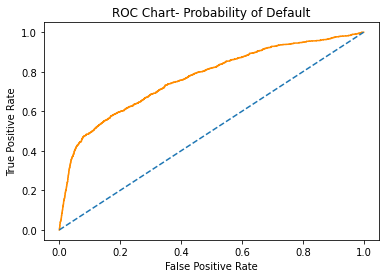

In [243]:
fallout,sensitivity,thresholds=roc_curve(y_test_final,prob_default)
plt.plot(fallout,sensitivity,color='darkorange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Chart- Probability of Default")
plt.show()

In [244]:
print(roc_auc_score(y_test_final,prob_default))

0.767804323893165


**So the accuracy for this model is about 81% and the AUC score is 77%**

### ***Threshold***

It means at what point a probability is default

In [245]:
preds_df_log['loan_status']=preds_df_log['prob_default'].apply(lambda x: 1 if x>0.50 else 0)
confusion_matrix(y_test_final,preds_df_log['loan_status'])

array([[4543,   88],
       [1031,  230]])

In [246]:
preds_df_log['loan_status']=preds_df_log['prob_default'].apply(lambda x: 1 if x>0.40 else 0)
confusion_matrix(y_test_final,preds_df_log['loan_status'])

array([[4252,  379],
       [ 662,  599]])

***Threshold at 0.40 gives the highest value for default recall***

### ***Calculating Loss with Logistic Regression Model***

In [247]:
preds_df_log['loan_status']=preds_df_log['prob_default'].apply(lambda x: 1 if x>0.40 else 0)

In [248]:
num_defaults=preds_df_log['loan_status'].value_counts()[1]

In [249]:
default_recall=precision_recall_fscore_support(y_test_final,preds_df_log['loan_status'])[1][1]

In [250]:
print("\nLoss (in $):\n")
print(cr_loan_final['loan_amnt'].mean() * num_defaults * (1 - default_recall))


Loss (in $):

4920514.08103075


***This loss would be around $4.9M USD. This seems too large amount of loss. So let's move on another model.............***

### ***eXtreme Gradient Boosting(XGBoost)***

In [251]:
from xgboost import XGBClassifier

In [252]:
clf_gbt=XGBClassifier().fit(X_train_final,np.ravel(y_train_final))

In [253]:
gbt_preds=clf_gbt.predict_proba(X_test_final)

In [254]:
preds_df=pd.DataFrame(gbt_preds[:,1][0:5],columns=['prob_default'])

In [255]:
true_df=y_test_final.head()

In [256]:
pd.concat([true_df.reset_index(drop=True),preds_df],axis=1)

,loan_status,prob_default
0,1,0.958741
1,1,0.651767
2,0,0.016084
3,0,0.013628
4,1,0.082786


***This model seems accurately predicting the probability of default for some loans with a true value of 1 in loan_status.***

In [257]:
gbt_pred=clf_gbt.predict(X_test_final)

In [258]:
print(gbt_pred)

[1 1 0 ... 0 0 0]


In [259]:
target_names=['Non-Default','Default']
print(classification_report(y_test_final,gbt_pred,target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.92      0.98      0.95      4631
     Default       0.91      0.68      0.78      1261

    accuracy                           0.92      5892
   macro avg       0.91      0.83      0.86      5892
weighted avg       0.92      0.92      0.91      5892



***The precision, recall scores are much better than logistic regression model.***

**Note:** predict_proba() produces a value between 0 and 1, and predict() produces a value 1 or 0 but performance is same for both method

### ***Feature Importance with get_booster() and get_score()***

In [260]:
clf_gbt.get_booster().get_score(importance_type='weight')

{'cb_person_cred_hist_length': 1,
 'loan_amnt': 7,
 'loan_grade_B': 3,
 'loan_grade_C': 23,
 'loan_grade_D': 31,
 'loan_grade_E': 17,
 'loan_grade_F': 5,
 'loan_grade_G': 16,
 'loan_int_rate': 115,
 'loan_intent_EDUCATION': 21,
 'loan_intent_HOMEIMPROVEMENT': 21,
 'loan_intent_MEDICAL': 13,
 'loan_intent_PERSONAL': 12,
 'loan_intent_VENTURE': 29,
 'loan_percent_income': 65,
 'person_age': 7,
 'person_emp_length': 25,
 'person_home_ownership_OTHER': 4,
 'person_home_ownership_OWN': 40,
 'person_home_ownership_RENT': 55,
 'person_income': 128}

In [261]:
import xgboost as xgb

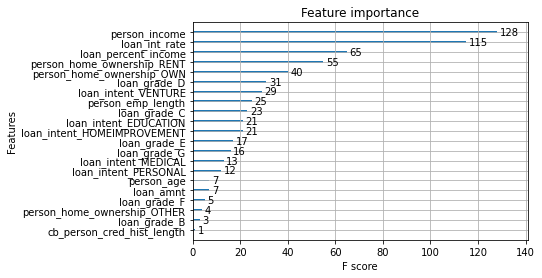

In [262]:
xgb.plot_importance(clf_gbt,importance_type='weight')
plt.show()

***Persons income is the most important columns. Further columns are loan interest rate, loan percentage income,respectively and so on.***

### ***Cross Validation***

Cross-validation is a technique that is used for the assessment of how the results of statistical analysis generalize to an independent data set. This results in a loss of testing and modeling capability. Cross-validation is also known as rotation estimation.


**Using DMatrix which is an ineternal data structure of XGBoost and it is optimized for both memory efficiency and training speed-**

In [263]:
n_folds=10
early_stopping=20

**Here-**

1.   n_folds is the number of folds which means that `(n/100)*100` percentage(%) of the data is used for testing randomly in per iteration.
2.   Early stopping tells cross validation to stop after a scoring metric has not improved after a number of iterations.



In [264]:
DTrain=xgb.DMatrix(X_train_final,label=y_train_final)

In [265]:
params={
    'objective': 'binary:logistic',
    'seed': 123,
    'eval_metric': 'auc'
}

In [266]:
cv_df=xgb.cv(params=params,dtrain=DTrain,num_boost_round=50,nfold=n_folds,early_stopping_rounds=early_stopping)

In [267]:
print(cv_df)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.897650       0.001295       0.891877      0.007559
1         0.905218       0.003196       0.899858      0.008196
2         0.912627       0.002182       0.907729      0.007632
3         0.918768       0.001400       0.912226      0.007653
4         0.921777       0.001092       0.914850      0.007394
5         0.925657       0.001822       0.917486      0.007248
6         0.929170       0.001271       0.920986      0.007087
7         0.931453       0.001188       0.922938      0.006592
8         0.933913       0.001287       0.924865      0.006614
9         0.935590       0.001220       0.926324      0.006205
10        0.937595       0.000788       0.927389      0.006388
11        0.939323       0.000689       0.928343      0.006337
12        0.941540       0.000836       0.929645      0.006396
13        0.943430       0.000757       0.930988      0.006417
14        0.944871       0.001263       0.931746      0

***The AUC for both train-auc-mean and test-auc-mean improves at each iteration of cross-validation.***

In [268]:
print(np.mean(cv_df['train-auc-mean']))

0.95389774


In [269]:
print(np.mean(cv_df['test-auc-mean']))

0.934287552


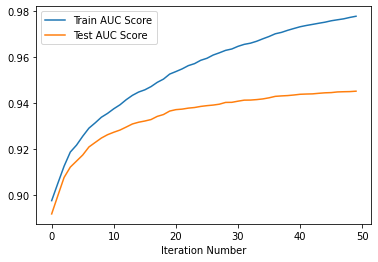

In [270]:
plt.plot(cv_df['train-auc-mean'])
plt.plot(cv_df['test-auc-mean'])
plt.xlabel("Iteration Number")
plt.legend(["Train AUC Score","Test AUC Score"])
plt.show()

***Both train and test auc scores are perfect for the XGBoost model***

**Using Cross-validation scoring to check the overall performance and also with hyperparameters of XGBoost Classifier-**

In [271]:
from sklearn.model_selection import cross_val_score

In [272]:
xbt=XGBClassifier(max_depth=5,learning_rate=0.1)

In [273]:
cv_score=cross_val_score(xbt,X_train_final,np.ravel(y_train_final),cv=10)

In [274]:
print(cv_score)

[0.93890539 0.92872295 0.93848112 0.93805685 0.93848112 0.9321171
 0.93423844 0.93081494 0.9295416  0.92359932]


In [275]:
print("Average Accuracy: %0.2f" % (cv_score.mean()))

Average Accuracy: 0.93


***With the hyperparameters and cross-validation, we can get the average accuracy up to 93%. This shows XGBoost model performs much better than Logistic Regression model***

### ***Class Imbalance***

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. Imbalanced classification is the problem of classification when there is an unequal distribution of classes in the training dataset

In [276]:
y_train_final['loan_status'].value_counts()

0    18365
1     5202
Name: loan_status, dtype: int64

***The difference between non-default(0) and default(1) is enough large in training data. An inaccurately predicted default has more negative financial impact***

**Undersampling Strategy-**

Combine smaller random sample of non-defaults with defaults.

In [277]:
X_y_train=pd.concat([X_train_final.reset_index(drop=True),y_train_final.reset_index(drop=True)],axis=1)

In [278]:
count_nondefault,count_default=X_y_train['loan_status'].value_counts()

In [279]:
nondefault=X_y_train[X_y_train['loan_status'] == 0]
default=X_y_train[X_y_train['loan_status'] == 1]

In [280]:
nondefault_under=nondefault.sample(count_default)

In [281]:
X_y_train_under=pd.concat([nondefault_under.reset_index(drop=True),default.reset_index(drop=True)],axis=0)

In [282]:
X_y_train_under['loan_status'].value_counts()

1    5202
0    5202
Name: loan_status, dtype: int64

***Our training set has an even number of defaults and non-default***

In [283]:
X_y_train_under.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y', 'loan_status'],
      dtype='object')

In [284]:
X_y_train_under.shape

(10404, 23)

In [285]:
X_train_under=X_y_train_under.drop('loan_status',axis=1)
y_train_under=X_y_train_under[['loan_status']]

In [286]:
clf_gbt_under=XGBClassifier().fit(X_train_under,np.ravel(y_train_under))

In [287]:
gbt_preds_under=clf_gbt_under.predict(X_test_final)

In [288]:
target_names=["Non-Default","Default"]
print(classification_report(y_test_final,gbt_pred,target_names=target_names))
print(classification_report(y_test_final,gbt_preds_under,target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.92      0.98      0.95      4631
     Default       0.91      0.68      0.78      1261

    accuracy                           0.92      5892
   macro avg       0.91      0.83      0.86      5892
weighted avg       0.92      0.92      0.91      5892

              precision    recall  f1-score   support

 Non-Default       0.93      0.91      0.92      4631
     Default       0.71      0.76      0.74      1261

    accuracy                           0.88      5892
   macro avg       0.82      0.84      0.83      5892
weighted avg       0.89      0.88      0.88      5892



In [289]:
print(confusion_matrix(y_test_final,gbt_pred))
print(confusion_matrix(y_test_final,gbt_preds_under))

[[4545   86]
 [ 402  859]]
[[4237  394]
 [ 297  964]]


In [290]:
print(roc_auc_score(y_test_final,gbt_pred))
print(roc_auc_score(y_test_final,gbt_preds_under))

0.8313174447072628
0.8396969120455174


***Undersampling the training data results in more false positives, but the recall for defaults and the AUC score are both higher than the original model. This means overall it predicts defaults much more accurately***

**Note:** The test set represents the type of data that will be seen by the model in the real world,so we should not undersample the test set.

### ***Calculating Loss with eXtreme Gradient Boost(XGBoost) Model***

In [291]:
preds_df_gbt=pd.DataFrame(gbt_preds[:,1],columns=['prob_default'])

In [292]:
preds_df_gbt['loan_status']=preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

In [293]:
num_defaults_gbt=preds_df_gbt['loan_status'].value_counts()[1]

In [294]:
default_recall_gbt=precision_recall_fscore_support(y_test_final,preds_df_gbt['loan_status'])[1][1]

In [295]:
print("\nLoss (in $):\n")
print(cr_loan_final['loan_amnt'].mean() * num_defaults_gbt * (1 - default_recall_gbt))


Loss (in $):

2921569.4856134


***The loss would be around $2.9M USD, it's not too much***

# ***Model Evaluation***

Logistic Regression Model vs eXtreme Gradient Boosting(XGBoost) Model

### **Comparing classification report-**

In [296]:
target_names=['Non-Default','Default']
preds_df_log['loan_status']=preds_df_log['prob_default'].apply(lambda x: 1 if x>0.40 else 0)
print(classification_report(y_test_final,preds_df_log['loan_status'],target_names=target_names))
print(classification_report(y_test_final,preds_df_gbt['loan_status'],target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.87      0.92      0.89      4631
     Default       0.61      0.48      0.54      1261

    accuracy                           0.82      5892
   macro avg       0.74      0.70      0.71      5892
weighted avg       0.81      0.82      0.81      5892

              precision    recall  f1-score   support

 Non-Default       0.92      0.97      0.94      4631
     Default       0.85      0.71      0.77      1261

    accuracy                           0.91      5892
   macro avg       0.89      0.84      0.86      5892
weighted avg       0.91      0.91      0.91      5892



In [297]:
print(precision_recall_fscore_support(y_test_final,preds_df_log['loan_status'],average='macro')[2])
print(precision_recall_fscore_support(y_test_final,preds_df_gbt['loan_status'],average='macro')[2])

0.712998979236362
0.8593851109103099


***The scores from the classification report are all higher for the gradient boosted tree***

### ***ROC and AUC Analysis-***

In [298]:
prob_default_log=preds_log[:,1]
prob_default_gbt=gbt_preds[:,1]

In [299]:
fallout_log,sensitivity_log,thresholds_log=roc_curve(y_test_final,prob_default_log)
fallout_gbt,sensitivity_gbt,thresholds_gbt=roc_curve(y_test_final,prob_default_gbt)

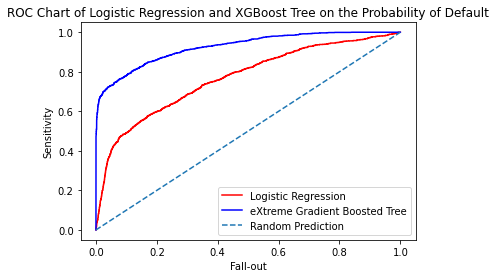

In [300]:
plt.plot(fallout_log,sensitivity_log,color='red',label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt,sensitivity_gbt,color='blue',label='%s' % 'eXtreme Gradient Boosted Tree')
plt.plot([0,1],[0,1],linestyle='--',label='%s' % 'Random Prediction')
plt.title("ROC Chart of Logistic Regression and XGBoost Tree on the Probability of Default")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

In [301]:
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test_final,prob_default_log))
print("eXtreme Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test_final,prob_default_gbt))

Logistic Regression AUC Score: 0.77
eXtreme Gradient Boosted Tree AUC Score: 0.93


***The ROC curve for the gradient boosted tree is not only the lift much higher, the calculated AUC score is also higher***

### ***Calibration Analysis***

In [302]:
from sklearn.calibration import calibration_curve

In [303]:
mean_pred_value_log,frac_of_pos_log=calibration_curve(y_test_final,prob_default_log,n_bins=5)

In [304]:
mean_pred_value_gbt,frac_of_pos_gbt=calibration_curve(y_test_final,prob_default_gbt,n_bins=5)

**Plotting step by step-**

Steps-
1.   Plotting perfect calibration line
2.   Plotting line for logistic regression
3.   Plotting line for XGBoost





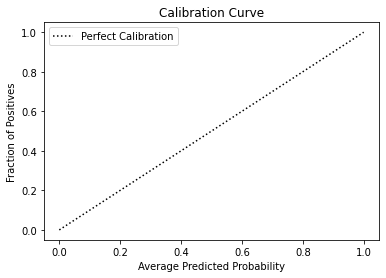

In [305]:
plt.plot([0,1],[0,1],'k:',label='Perfect Calibration')
plt.xlabel("Average Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

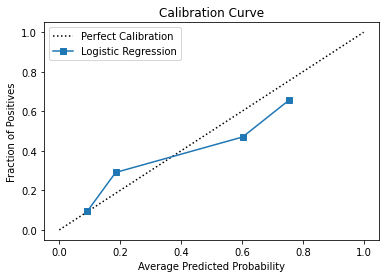

In [306]:
plt.plot([0,1],[0,1],'k:',label='Perfect Calibration')
plt.plot(mean_pred_value_log,frac_of_pos_log,'s-',label='%s' % 'Logistic Regression')
plt.xlabel("Average Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

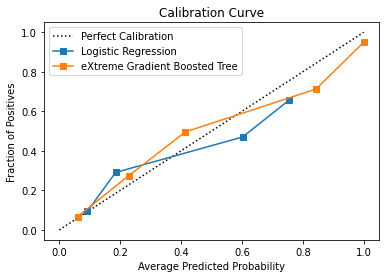

In [307]:
plt.plot([0,1],[0,1],'k:',label='Perfect Calibration')
plt.plot(mean_pred_value_log,frac_of_pos_log,'s-',label='%s' % 'Logistic Regression')
plt.plot(mean_pred_value_gbt,frac_of_pos_gbt,'s-',label='%s' % 'eXtreme Gradient Boosted Tree')
plt.xlabel("Average Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

***For the logistic regression, the calibration for probabilities starts off great but then gets more erratic as it the average probability approaches around 0.5. Something similar happens to the extreme gradient boosted tree around 0.7, but the model eventually stabilizes.***

### ***Comparing the Loss***

**Formula:**
```
loss = average loan amount * number of default prediction * default recall
```



In [308]:
log_loss=cr_loan_final['loan_amnt'].mean() * num_defaults * (1 - default_recall)/1000000
gbt_loss=cr_loan_final['loan_amnt'].mean() * num_defaults_gbt * (1 - default_recall_gbt)/1000000
print("Loss:\n")
print("Using Logistic Regression Model (in Million $): %0.2f" % log_loss)
print("Using XGBoost Model (in Million $): %0.2f" % gbt_loss)
difference=np.subtract(log_loss,gbt_loss).round(2)
print("\n")
print("Loss is Reduced by $"+str(difference)+"M USD Using XGBoost Model")

Loss:

Using Logistic Regression Model (in Million $): 4.92
Using XGBoost Model (in Million $): 2.92


Loss is Reduced by $2.0M USD Using XGBoost Model


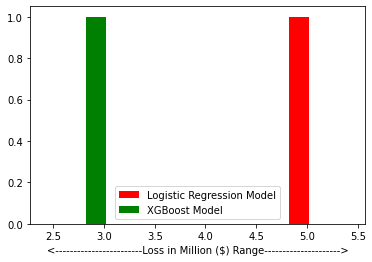

In [309]:
plt.hist(log_loss,color='red',label='Logistic Regression Model',bins=5)
plt.hist(gbt_loss,color='green',label='XGBoost Model',bins=5)
plt.xlabel("<------------------------Loss in Million ($) Range--------------------->")
plt.legend()
plt.show()

***From the above calculation, unexpected Loss is Reduced by $2.0M USD Using XGBoost Model.***

***We can see that, performance for eXtreme Gradient Boosted Model is higher than Logistic Regression Model in all aspects and it also reduces the loss which is very important for any business company to give a loan. So, we will be focusing on only the XGBoost model from now on for further analysis.***

# ***Final Analysis***

### ***Credit Acceptance and Threshold***

Using an acceptance rate and calculating the threshold for that rate, I can use to set the percentage rate of new loans I want to accept. 
***
**Accepted rate:** the percentage of new loans are accepted to keep the number of defaults in low.

In [310]:
preds_df_gbt=pd.DataFrame(gbt_preds[:,1],columns=['prob_default'])

preds_df_gbt['loan_status']=preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

**Previously I set a threshold for a range of probability of default values which was used to change the predicted loan status(non-default and default) of the loan.**

In [311]:
preds_df_gbt['prob_default'].describe()

count    5892.000000
mean        0.214869
std         0.294736
min         0.000833
25%         0.041317
50%         0.082065
75%         0.205257
max         0.999702
Name: prob_default, dtype: float64

In [312]:
thresh_85=np.quantile(preds_df_gbt['prob_default'],0.85)

In [313]:
thresh_85

0.5675462901592254

***For accepting rate 85%, threshold rate is approximately 56%***

**Now applyng the new threshold-**

In [314]:
preds_df_gbt['pred_loan_status']=preds_df_gbt['prob_default'].apply(lambda x: 1 if x > thresh_85 else 0)

In [315]:
print(preds_df_gbt['pred_loan_status'].value_counts())

0    5008
1     884
Name: pred_loan_status, dtype: int64


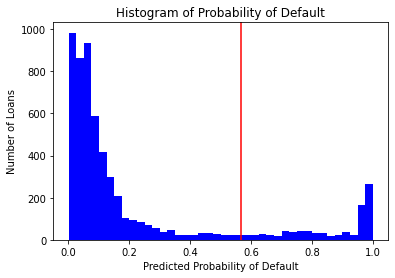

In [316]:
plt.hist(prob_default_gbt,color='blue',bins=40)
threshold=np.quantile(prob_default_gbt,0.85)
plt.axvline(x=threshold,color='red')
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Number of Loans")
plt.title("Histogram of Probability of Default")
plt.show()

***In the left side of the red line indicates how many loans will be accepted.***
***
***In the right side of the red line indicates how many loans will be rejected.***





### ***Bad Rate***

Within a calculated threshold, some loans will be defaults. The percentage of accounts that perform in an unsatisfactory manner as defined by the good/bad definition that was used in the scorecard development which means accounts with unacceptable repayment behaviour.

**Formula:**
```
bad rate = accepted bad / total accepted
```



In [317]:
preds_df_gbt.head()

,prob_default,loan_status,pred_loan_status
0,0.958741,1,1
1,0.651767,1,1
2,0.016084,0,0
3,0.013628,0,0
4,0.082786,0,0


In [318]:
accepted_loans=preds_df_gbt[preds_df_gbt['pred_loan_status'] == 0]

In [319]:
print(np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count())

0.03494408945686901


***The bad rate is only 3% approximately. It is not too high.***

### ***Credit Strategy***

First acceptance rate was set to 85%, but other rates might be selected as well. **Strategy table** which contains all the possible acceptance rate I wish to look at along with their associated bad rates and threshold values.

In [320]:
accepted_rate=[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
print(accepted_rate)

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]


In [321]:
thresholds=[]
bad_rates=[]

In [322]:
for rate in accepted_rate:
  threshold=np.quantile(preds_df_gbt['prob_default'],rate).round(3)
  thresholds.append(np.quantile(preds_df_gbt['prob_default'],rate).round(3))
  preds_df_gbt['pred_loan_status']=preds_df_gbt['prob_default'].apply(lambda x: 1 if x > threshold else 0)
  accepted_loans=preds_df_gbt[preds_df_gbt['pred_loan_status'] == 0]
  bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))

In [323]:
strat_df=pd.DataFrame(zip(accepted_rate,thresholds,bad_rates),columns=['Acceptance Rate','Threshold','Bad Rate'])

In [324]:
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,1.00,1.000,0.180
1,0.95,0.973,0.137
2,0.90,0.800,0.088
3,0.85,0.568,0.035
4,0.80,0.307,0.000
5,0.75,0.205,0.000
6,0.70,0.154,0.000
7,0.65,0.129,0.000
8,0.60,0.110,0.000
9,0.55,0.093,0.000


***This uses our specific predictions on the credit data, and can be used to see the acceptance rates, bad rates, and financial impact all at once.***

**Visualizing the strategy table-**

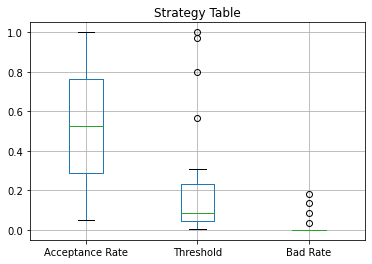

In [325]:
strat_df.boxplot()
plt.title("Strategy Table")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


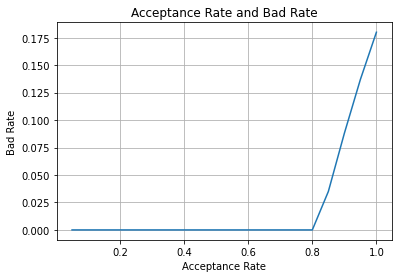

In [326]:
plt.plot(strat_df['Acceptance Rate'],strat_df['Bad Rate'])
plt.xlabel("Acceptance Rate")
plt.ylabel("Bad Rate")
plt.title("Acceptance Rate and Bad Rate")
plt.axes().xaxis.grid()
plt.axes().yaxis.grid()
plt.show()

***The box plot shows that the distribution of acceptance rates are very much higher than bad rates.That means that the model's calibration is likely much exellent.***
***
***The line plot shows that the bad rates are almost 0 until the acceptance rates 0.8. It also shows that if we accept all the loans than around 18% of loans would be default***

# ***Conclusion***

After implementation, the Logistic Regression model gives **82%** and the eXtreme Gradient Boosting(XGBoost) model gives **91%** accuracy. XGBoost models performs much better than Logistic Regression in all aspects such as classification report, roc chart, auc score and it also reduces the loss of a company. But in general,  XGBoost is not good in *probability collaboration* as compared to Logistic Regression, however XGBoost is *faster* than Logistic Regression. The performance of machine learning algorithms always depends on the use case to decide which model to opt for.

There are many machine learning algorithms for classification problems but I have used Logistic Regression and eXtreme Gradient Boosting algorithm because-

*   They are mathematically simple and easy to understand
*   There performance is acceptable

Complex models may difficult to explain in business as a result they cannot make their decision perfectly. Even though complex models may perform well but in many cases, business users will not accept a model they cannont understand. Complex models can also be difficult to put into production. 

Further work for improving the model performance-

*   By gathering more data
*   By preparing the data in different manners

                                    
